In [1]:
from PosSelect_Functions_Old import *
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import pandas as pd
import numpy as np
import copy
import seaborn as sns
from scipy.stats import mannwhitneyu as mwu
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from statsmodels.stats.multitest import fdrcorrection
from scipy.stats import wilcoxon
from scipy.optimize import curve_fit
from scipy.stats import fisher_exact
from scipy.stats import norm
from collections import Counter

hfont = {'fontname':'Arial'}
plt.rcParams["font.family"] = "Arial"

#Code borrowed heavily from here: https://stackoverflow.com/questions/62375034/find-non-overlapping-area-between-two-kde-plots
plt.rcParams.update(
    {"text.usetex": False}
)

def parse_table(i):
    return [int(x) for x in i.replace("[", "").replace("]", "").split(",")]

d_abrev = {"LiangSteinNeuron":"FC exc. neur.", "FetalChondrocytes":"F chond.", "SertoliMale":"FG sertoli", "preGC_IIaFemale":"FG preGC IIa",\
          "NeuralFemale":"FG neur.", "FetalGonadImmuneFemale":"FG immune", "VIP":"AC VIP inh. neur.", "LiangSteinProgenitor":"FC prog.",\
          "AdultHeartVentricularCardiomyocyte":"AH cardiomyo.", "AdultLoopOfHenle":"AK loop of henle", "FetalBrainNeurGlioblast_CB_VZ":"FCB glioblast",\
         "AdultProximalTubule":"AK prox. tub.", "FetalLeydigMale":"FG leydig", "SST":"AC SST inh neur.", "KosoyRoussosControlMicroglia":"AC microglia",\
         "FetalBrainFloorPlate":"FB fl. plate", "FetalArterialECs":"FH endoth.", "ASCT":"AC astro.", "FetalBrainCOP":"FB COP",\
         "AMY":"AA neur.", "PVALB":"AC PVALB inh neur.", "ITL23":"AC L2-3 IT neur.", "FetalBrainNeurCB_GNP_IPC_1":"FB inter. prog.", "FetalBrainNeurDAergic":"FB DA neur.",\
          "OGC":"AC Oligo.", "D1Pu":"AP D1 inh neur.", "FetalBrainNeurSerotonergic":"FB 5-HT neur.", "FetalBrainNeurDRG_2":"FS DRG neur.",\
          "FetalHeartPericytes":"FH peri.", "FetalHeartEndocardium":"FH endocard.", "FetalHeartCardiacFibroblasts":"FH fibro.", "FetalBrainNeurPurkinje_6":"FCB Purk. inh neur.",\
          "AdultHeartSmoothMuscle":"AH smooth musc.", "FetalBrainRoofPlate":"FB ro. plate"}

C:\Users\astar\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [15]:
real = pd.read_csv("PerChrom_Results/PerChrom_PhyloP447_SpecSup250_MAFCut0.25.txt.gz", sep = "\t")
real

,Chrom,Median Fixed PhyloP,Number Fixed Variants,Median Polymorphic PhyloP,Number Polymorphic Variants,Fisher exact p-value,MWU p-value,Fisher exact p-value; alt greater,MWU p-value; alt greater,alpha,Cutoff,"[[dc1, du1], [pc1, pu1]]","[[dc2, du2], [pc2, pu2]]",Proportion
0,chrX,0.165,163373,0.153,34057,1.607482e-01,0.000161,0.080049,0.000081,0.081369,4.223,"[[1776, 161597], [340, 33717]]","[[1777, 161596], [341, 33716]]",0.99
1,chrX,0.165,163373,0.153,34057,2.617321e-04,0.000161,0.000132,0.000081,0.046243,0.595,"[[50629, 112744], [10212, 23845]]","[[50673, 112700], [10222, 23835]]",0.70
2,chrX,0.165,163373,0.153,34057,1.691994e-03,0.000161,0.000855,0.000081,0.037444,0.342,"[[66800, 96573], [13611, 20446]]","[[66880, 96493], [13630, 20427]]",0.60
3,chrX,0.165,163373,0.153,34057,1.061045e-02,0.000161,0.005318,0.000081,0.037286,0.967,"[[33675, 129698], [6809, 27248]]","[[33704, 129669], [6818, 27239]]",0.80
4,chrX,0.165,163373,0.153,34057,2.097107e-01,0.000161,0.105774,0.000081,0.033810,2.333,"[[8436, 154937], [1701, 32356]]","[[8440, 154933], [1704, 32353]]",0.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,chr19,-0.112,52162,-0.101,13644,1.245429e-01,0.538915,0.945691,0.730542,-0.166508,5.165,"[[448, 51714], [136, 13508]]","[[448, 51714], [137, 13507]]",0.99
157,chr18,-0.047,160185,-0.038,42379,2.387074e-03,0.020471,0.998962,0.989764,-0.188950,4.240,"[[1348, 158837], [423, 41956]]","[[1349, 158836], [424, 41955]]",0.99
158,chr7,-0.020,298509,-0.010,81447,4.595026e-07,0.000039,1.000000,0.999980,-0.231807,4.306,"[[2427, 296082], [814, 80633]]","[[2429, 296080], [815, 80632]]",0.99
159,chr17,-0.024,126582,-0.017,34914,4.370035e-04,0.060086,0.999801,0.969957,-0.249050,4.891,"[[1016, 125566], [349, 34565]]","[[1017, 125565], [350, 34564]]",0.99


C:\Users\astar\AppData\Local\Temp\ipykernel_11820\2393823529.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, y = "alpha", x = "Chromosome", order = order, palette = palette)


,Chromosome,Lower95,Upper95
22,chrX,0.016118,0.057827
0,chr1,-0.015185,0.014129
15,chr3,-0.023665,0.002444
11,chr2,-0.034449,-0.009115
6,chr15,-0.035343,0.008679
4,chr13,-0.035402,0.002692
19,chr7,-0.037925,-0.005722
5,chr14,-0.038784,0.002967
18,chr6,-0.040583,-0.013867
14,chr22,-0.041057,0.038601


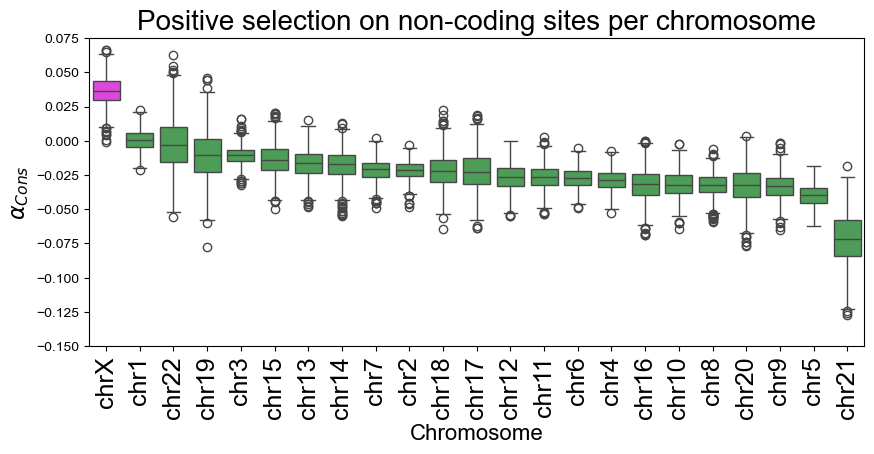

In [23]:
df = pd.read_csv("PerChrom_Results/PerChrom_PhyloP447_SpecSup250_MAFCut0.25_AllChroms_Bootstrap.txt.gz", sep = "\t")
df = df[df["Proportion"] == 0.6]

medians = []
ci = []
palette = {}
for ct in np.unique(df["Chrom"]):
    dff = df[(df["Chrom"].isin([ct]))]
    dff = dff.sort_values("alpha")
    ci.append([ct, list(dff["alpha"])[25], list(dff["alpha"])[975]])
    medians.append([ct, np.median(dff["alpha"])])
    
df_med = pd.DataFrame(medians).sort_values(1, ascending = False)
order = list(df_med[0])

df_ci = pd.DataFrame(ci)
df_ci.columns = ["Chromosome", "Lower95", "Upper95"]
df_ci = df_ci.sort_values("Lower95", ascending = False)

df.columns = ["Chromosome"] + list(df.columns)[1:]

for index, row in df_ci.iterrows():
    if row["Lower95"] > 0:
        palette[row["Chromosome"]] = "#F42FF5"
    else:
        palette[row["Chromosome"]] = "#40A94D"

fig, ax = plt.subplots(figsize = (10, 4))
sns.boxplot(data = df, y = "alpha", x = "Chromosome", order = order, palette = palette)
plt.ylim(-0.15, 0.075)
plt.ylabel("$\\alpha_{Cons}$", size = 16)
plt.xlabel("Chromosome", size = 16)
plt.title("Positive selection on non-coding sites per chromosome", size = 20)
plt.xticks(rotation = 90, size = 18)
#plt.title("Positive selection in HARs across cell types", size = 25)

df_ci

In [24]:
#Exploring the chromosome X stuff
v, yvalls = read_noncoding_data_fast(path = "./", maf_cut = 0.25, spec_sup = 250)

yvalls.index = yvalls["Position"]
yvalls = add_unfold(yvalls)

10549162 6483874
10326920 6229149
10030151 5801859
(10030151, 6)
(5498973, 6)
(5498973, 6)


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:583: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yvalls_alt["UnfoldedMAF"] = 1-yvalls_alt["MAFMaxAcrossAncestry"]
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:584: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yvalls_ref["UnfoldedMAF"] = yvalls_ref["MAFMaxAcrossAncestry"]


In [26]:
#Because vv is faster to type
vv = yvalls.copy()
yvalls = 0

In [27]:
#Restrict to chrX
v["Chrom"] = [x.split(":")[0] for x in v["Position"]]
vv["Chrom"] = [x.split(":")[0] for x in vv["Position"]]

vx = v[v["Chrom"].isin(["chrX"])]
vvx = vv[vv["Chrom"].isin(["chrX"])]


In [32]:
print((fisher_exact(alpha[-2], alternative = "greater")[1] + fisher_exact(alpha[-3], alternative = "greater")[1])/2)


0.0007785772430150136


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

SignificanceResult(statistic=1.039102000809776, pvalue=0.0016182590713468901)


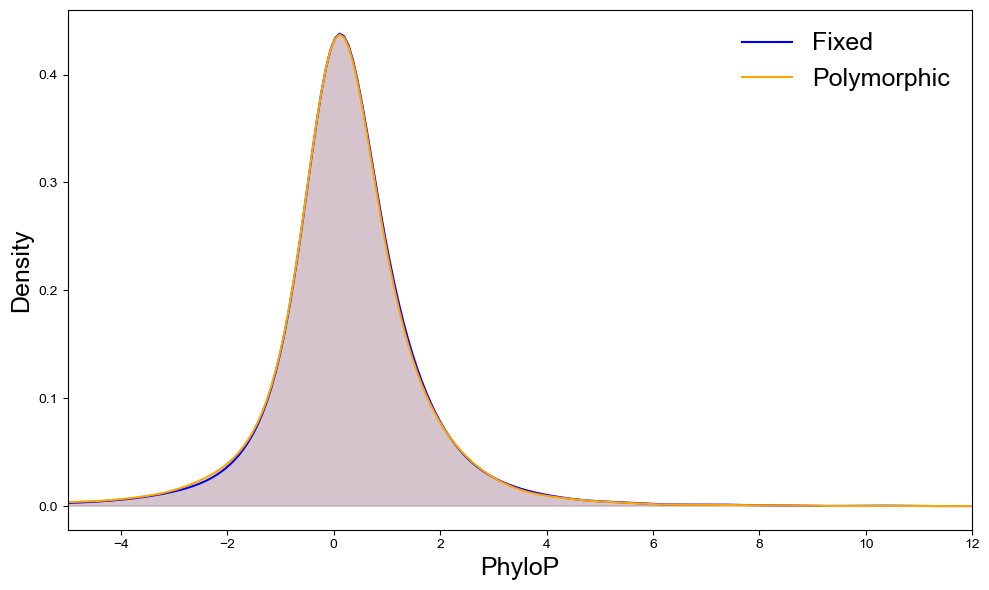

In [30]:
vvv = prepare_alpha(vx, vvx, stat = "PhyloP447")
cuttt = 0.6
z = list(vvx["PhyloP447"])
z.sort()
cutoff = z[int(floor((len(z)*cuttt)))]
alpha = compute_alpha_cutoff(vvv, plot = True, cutoff = cutoff)
print((fisher_exact(alpha[-2], alternative = "greater")[1] + fisher_exact(alpha[-3], alternative = "greater")[1])/2)
print(alpha)

In [33]:
#Read in the chrX selective sweep regions
kl = pd.read_csv("KasperLange_CellReports2023_chrX.csv", header = None)
vx_kl = pd.DataFrame()
vvx_kl = pd.DataFrame()

for index, row in kl.iterrows():
    vx_kl = pd.concat([vx_kl, vx[vx["Position"].isin(["chrX:" + str(i) for i in range(row[1], row[2])])]])
    vvx_kl = pd.concat([vvx_kl, vvx[vvx["Position"].isin(["chrX:" + str(i) for i in range(row[1], row[2])])]])

0.23449056062070422
(0.08859915236131072, 1.692, [[954, 7810], [87, 786]], [[955, 7809], [88, 785]], <Figure size 1000x600 with 1 Axes>)


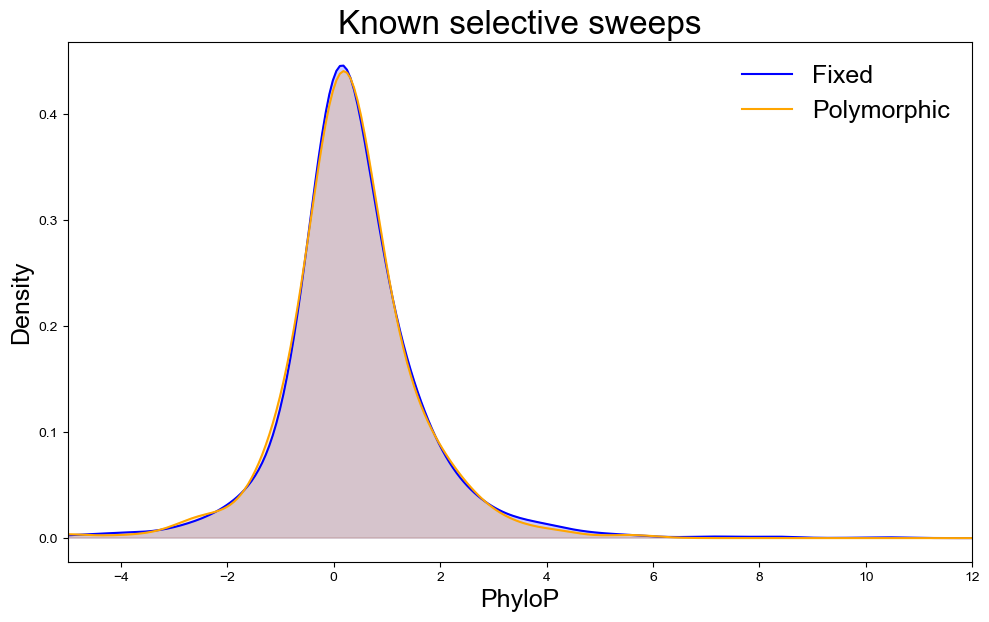

In [55]:
#Test on those regions
vvv = prepare_alpha(vx_kl, vvx_kl, stat = "PhyloP447")
cuttt = 0.9
z = list(vvx_kl["PhyloP447"])
z.sort()
cutoff = z[int(floor((len(z)*cuttt)))]
alpha = compute_alpha_cutoff(vvv, plot = True, cutoff = cutoff, title = "Known selective sweeps")
print((fisher_exact(alpha[-2], alternative = "greater")[1] + fisher_exact(alpha[-3], alternative = "greater")[1])/2)
print(alpha)

0.2895542931772329
(0.011349489694616188, 1.634, [[15596, 138938], [3311, 29850]], [[15610, 138924], [3317, 29844]], <Figure size 1000x600 with 1 Axes>)


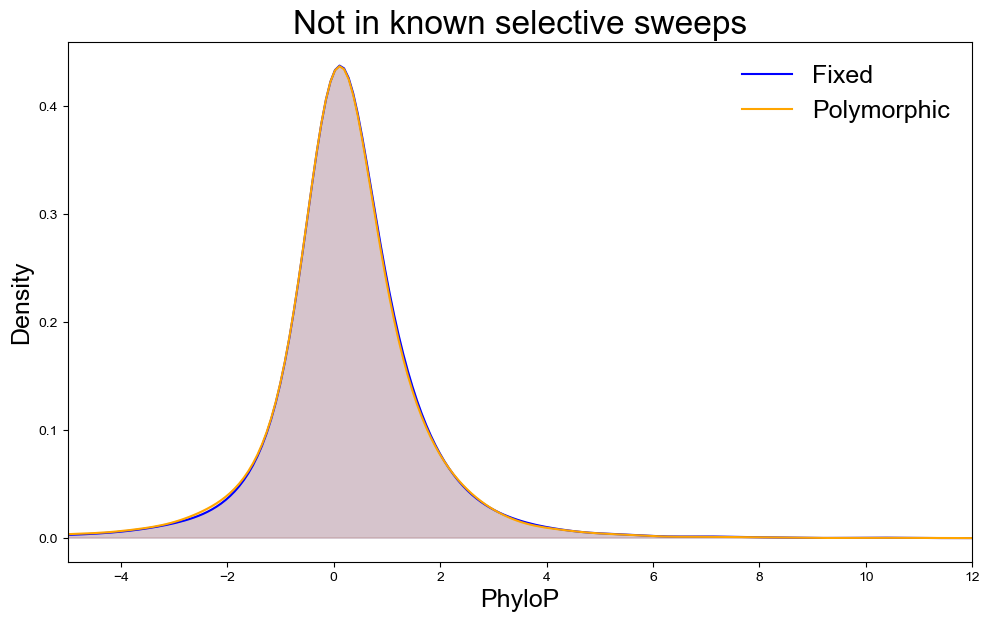

In [54]:
#Test on everything without those regions
vx_nkl = vx[~vx["Position"].isin(vx_kl["Position"])].copy()
vvx_nkl = vvx[~vvx["Position"].isin(vvx_kl["Position"])].copy()
vvv = prepare_alpha(vx_nkl, vvx_nkl, stat = "PhyloP447")
cuttt = 0.9
z = list(vvx_nkl["PhyloP447"])
z.sort()
cutoff = z[int(floor((len(z)*cuttt)))]
alpha = compute_alpha_cutoff(vvv, plot = True, cutoff = cutoff, title = "Not in known selective sweeps")
print((fisher_exact(alpha[-2], alternative = "greater")[1] + fisher_exact(alpha[-3], alternative = "greater")[1])/2)
print(alpha)

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

0.09232239203997261
(0.1634802013791472, 1.125, [[365, 2771], [81, 739]], [[366, 2770], [82, 738]], <Figure size 1000x600 with 1 Axes>)


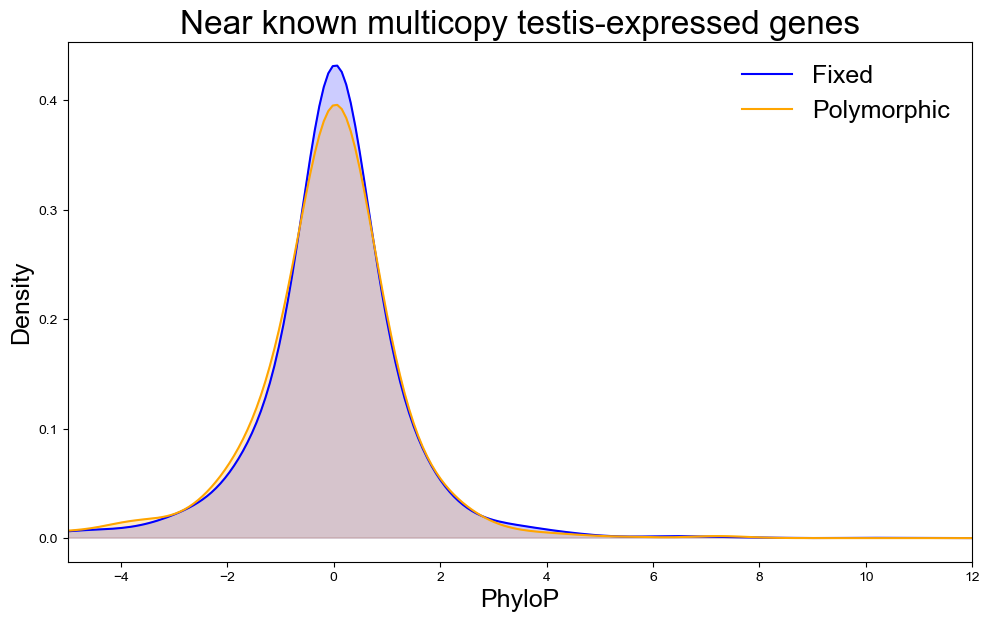

In [53]:
#Test only on those regions near our multi-copy and ampliconic expansions
amp = pd.read_csv("chrX_Ampliconic.csv")
amp = amp[amp["Gene class"].isin(["Multicopy", "Ampliconic"])]

vx_amp = vx[vx["NearestGene"].isin(amp["Gene name"])]
vvx_amp = vvx[vvx["NearestGene"].isin(amp["Gene name"])]

#Test on those regions
vvv = prepare_alpha(vx_amp, vvx_amp, stat = "PhyloP447")
cuttt = 0.9
z = list(vvx_amp["PhyloP447"])
z.sort()
cutoff = z[int(floor((len(z)*cuttt)))]
alpha = compute_alpha_cutoff(vvv, plot = True, cutoff = cutoff, title = "Near known multicopy testis-expressed genes")
print((fisher_exact(alpha[-2], alternative = "greater")[1] + fisher_exact(alpha[-3], alternative = "greater")[1])/2)
print(alpha)

0.01911346830131359
(0.03292507107225495, 1.125, [[26825, 127709], [5598, 27563]], [[26851, 127683], [5605, 27556]], <Figure size 1000x600 with 1 Axes>)


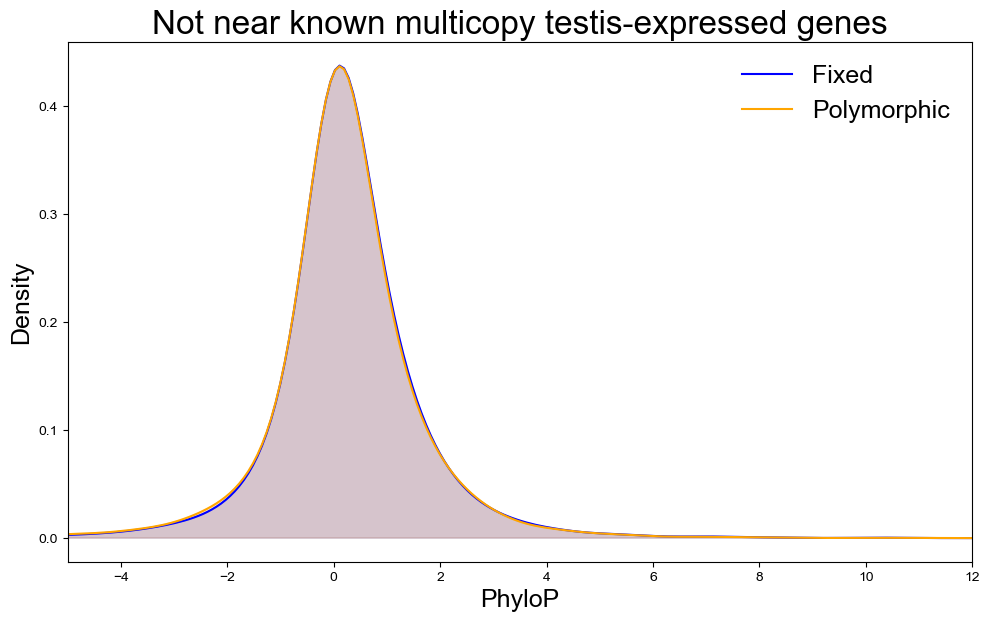

In [52]:
#Test only on anything not in those regions near our multi-copy and ampliconic expansions
vx_namp = vx[~vx["Position"].isin(vx_amp["Position"])].copy()
vvx_namp = vvx[~vvx["Position"].isin(vvx_amp["Position"])].copy()
vvv = prepare_alpha(vx_nkl, vvx_nkl, stat = "PhyloP447")
cuttt = 0.9
z = list(vvx_amp["PhyloP447"])
z.sort()
cutoff = z[int(floor((len(z)*cuttt)))]
alpha = compute_alpha_cutoff(vvv, plot = True, cutoff = cutoff, title = "Not near known multicopy testis-expressed genes")
print((fisher_exact(alpha[-2], alternative = "greater")[1] + fisher_exact(alpha[-3], alternative = "greater")[1])/2)
print(alpha)

In [5]:
hpo = pd.read_csv("../DPSC_CNCC/HPO_AccelEvol_Input.txt", sep= "\t")
d_HPO = {}

for index, row in hpo.iterrows():
    d_HPO[row["Term"]] = row["Genes"].split(";")

gobp = pd.read_csv("../DPSC_CNCC/GOBP_AccelEvol_Input.txt", sep= "\t")
d_BP = {}

for index, row in gobp.iterrows():
    if "ucus" in row["Term"]:
        print(row["Term"])
    d_BP[row["Term"]] = row["Genes"].split(";")
    
kegg = pd.read_csv("../DPSC_CNCC/KEGG_AccelEvol_Input.txt", sep= "\t")
d_KEGG = {}

for index, row in kegg.iterrows():
    if "ucus" in row["Term"]:
        print(row["Term"])
    d_KEGG[row["Term"]] = row["Genes"].split(";")

In [153]:
c = 0
out = []
vx.index = vx["NearestGene"]
vvx.index = vvx["NearestGene"]

for key in d_HPO.keys():
    if c%1000 == 0:
        print(c)
    if len(d_HPO[key]) >= 15 and len(d_HPO[key]) < 100:
        vk = vx.loc[np.intersect1d(np.intersect1d(vx.index, d_HPO[key]), vvx.index)]
        vvk = vvx.loc[np.intersect1d(np.intersect1d(vvx.index, d_HPO[key]), vx.index)]
        x2 = [np.float64(x) for x in list(vk["PhyloP447"])]
        yvals2 = [np.float64(j) for j in list(vvk["PhyloP447"])]
        yvals2.sort()
        if len(vk.index) >= 100 and len(vvk.index) >= 50:
            vvv = prepare_alpha(vk, vvk, stat = "PhyloP447")
            for cuttt in [0.6, 0.7, 0.8, 0.9]:
                cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]
                alpha = compute_alpha_cutoff(vvv, dn_cut = 0.05, plot = False, cutoff = cutoff)

                table1 = alpha[2]
                table2 = alpha[3]
                
                out.append([key, np.median(x2), len(x2), np.median(yvals2), len(yvals2), (fisher_exact(table1)[1] + fisher_exact(table2)[1])/2, mwu(x2, yvals2)[1], (fisher_exact(table1, alternative = "greater")[1] + fisher_exact(table2, alternative = "greater")[1])/2, mwu(x2, yvals2, alternative = "greater")[1], alpha[0], alpha[1], table1, table2, cuttt])
    c += 1
    
from statsmodels.stats.multitest import fdrcorrection
df = pd.DataFrame(out)
df = df.sort_values(7)
df.columns = ["Term", "Median Fixed PhyloP", "Number Fixed Variants", "Median Polymorphic PhyloP", "Number Polymorphic Variants", "Fisher exact p-value", "MWU p-value", "Fisher exact p-value; alt greater", "MWU p-value; alt greater", "alpha", "Cutoff", "[[dc1, du1], [pc1, pu1]]", "[[dc2, du2], [pc2, pu2]]", "Proportion"]
df.to_csv("Finalizing_FisherExact_Unfold_NewHPO_NonCod_MafCut0.25-0.75_chrX_NonCod_SpecSup250.csv", index = False)

0
1000
2000
3000
4000
5000
6000
7000


In [126]:
c = 0
out = []
vx.index = vx["NearestGene"]
vvx.index = vvx["NearestGene"]

for gene in np.unique(vx.index):
    if c%1000 == 0:
        print(c)
    vk = vx.loc[np.intersect1d(vx.index, gene)]
    vvk = vvx.loc[np.intersect1d(vvx.index, gene)]
    x2 = [np.float64(x) for x in list(vk["PhyloP447"])]
    yvals2 = [np.float64(j) for j in list(vvk["PhyloP447"])]
    yvals2.sort()
    if len(vk.index) >= 100 and len(vvk.index) >= 50:
        vvv = prepare_alpha(vk, vvk, stat = "PhyloP447")
        for cuttt in [0.6, 0.7, 0.8, 0.9]:
            cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]
            alpha = compute_alpha_cutoff(vvv, dn_cut = 0.05, plot = False, cutoff = cutoff)

            table1 = alpha[2]
            table2 = alpha[3]

            out.append([gene, np.median(x2), len(x2), np.median(yvals2), len(yvals2), (fisher_exact(table1, alternative = "greater")[1] + fisher_exact(table2, alternative = "greater")[1])/2, mwu(x2, yvals2)[1], (fisher_exact(table1, alternative = "greater")[1] + fisher_exact(table2, alternative = "greater")[1])/2, mwu(x2, yvals2, alternative = "greater")[1], alpha[0], alpha[1], table1, table2, cuttt])
    c += 1
    
from statsmodels.stats.multitest import fdrcorrection
df = pd.DataFrame(out)
df = df.sort_values(7)
df.columns = ["Gene", "Median Fixed PhyloP", "Number Fixed Variants", "Median Polymorphic PhyloP", "Number Polymorphic Variants", "Fisher exact p-value", "MWU p-value", "Fisher exact p-value; alt greater", "MWU p-value; alt greater", "alpha", "Cutoff", "[[dc1, du1], [pc1, pu1]]", "[[dc2, du2], [pc2, pu2]]", "Proportion"]
df.to_csv("Finalizing_FisherExact_Unfold_PerGene_NonCod_MafCut0.25-0.75_chrX_NonCod_SpecSup250.csv", index = False)

0


In [125]:
len(out)

24

In [156]:
df = pd.read_csv("ForPub_DoubleIntersect_FisherExact_Unfold_NewHPO_NonCod_MafCut0.25-0.75_chrX_NonCod_SpecSup250.csv")
new_df = pd.DataFrame()
for prop in np.unique(df["Proportion"]):
    df2 = df[df["Proportion"] == prop]
    df2["Fisher exact FDR"] = fdrcorrection(df2["Fisher exact p-value; alt greater"])[1]
    df2["MWU FDR"] = fdrcorrection(df2["MWU p-value; alt greater"])[1]
    new_df = pd.concat([new_df, df2])
df = new_df.sort_values("Fisher exact FDR")
df_sig = df[df["Fisher exact FDR"] < 0.1]
df_sig2 = df[df["MWU FDR"] < 0.1]
df_sig

C:\Users\astar\AppData\Local\Temp\ipykernel_11820\2654536570.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Fisher exact FDR"] = fdrcorrection(df2["Fisher exact p-value; alt greater"])[1]
C:\Users\astar\AppData\Local\Temp\ipykernel_11820\2654536570.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["MWU FDR"] = fdrcorrection(df2["MWU p-value; alt greater"])[1]
C:\Users\astar\AppData\Local\Temp\ipykernel_11820\2654536570.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

,Term,Median Fixed PhyloP,Number Fixed Variants,Median Polymorphic PhyloP,Number Polymorphic Variants,Fisher exact p-value,MWU p-value,Fisher exact p-value; alt greater,MWU p-value; alt greater,alpha,Cutoff,"[[dc1, du1], [pc1, pu1]]","[[dc2, du2], [pc2, pu2]]",Proportion,Fisher exact FDR,MWU FDR
0,Cerebellar vermis hypoplasia,0.2615,3286,0.1845,606,0.000106,0.013076,0.000057,0.006538,0.415403,1.493,"[[524, 2762], [60, 546]]","[[524, 2762], [61, 545]]",0.9,0.036699,0.730178
1,Short toe,0.3100,1465,0.1020,191,0.000231,0.001253,0.000135,0.000626,0.574589,1.294,"[[316, 1149], [19, 172]]","[[316, 1149], [21, 170]]",0.9,0.043700,0.297169


5.672118617920607e-05
SignificanceResult(statistic=1.7264301230992034, pvalue=4.32965439888197e-05)


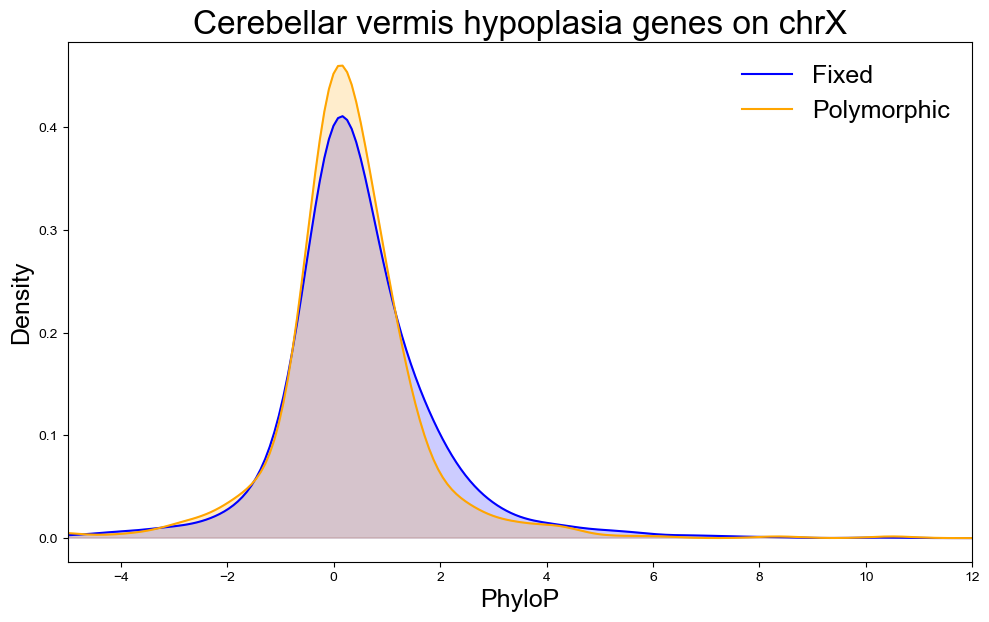

In [181]:
key = "Cerebellar vermis hypoplasia"

vk = vx.loc[np.intersect1d(np.intersect1d(vx.index, d_HPO[key]), vvx.index)]
vvk = vvx.loc[np.intersect1d(np.intersect1d(vvx.index, d_HPO[key]), vx.index)]
x2 = [np.float64(x) for x in list(vk["PhyloP447"])]
yvals2 = [np.float64(j) for j in list(vvk["PhyloP447"])]
yvals2.sort()
if len(vk.index) >= 100 and len(vvk.index) >= 50:
    vvk = vvk[~vvk["NearestGene"].isin(["SHOX"])]
    vvv = prepare_alpha(vk, vvk, stat = "PhyloP447")
    cuttt = 0.9
    cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]
    alpha = compute_alpha_cutoff(vvv, dn_cut = 0.05, plot = True, cutoff = cutoff, title = key + " genes on chrX")

    table1 = alpha[2]
    table2 = alpha[3]
    print((fisher_exact(table1, alternative = "greater")[1] + fisher_exact(table2, alternative = "greater")[1])/2)
    print((fisher_exact(table1, alternative = "greater")))

0.004559748115248419


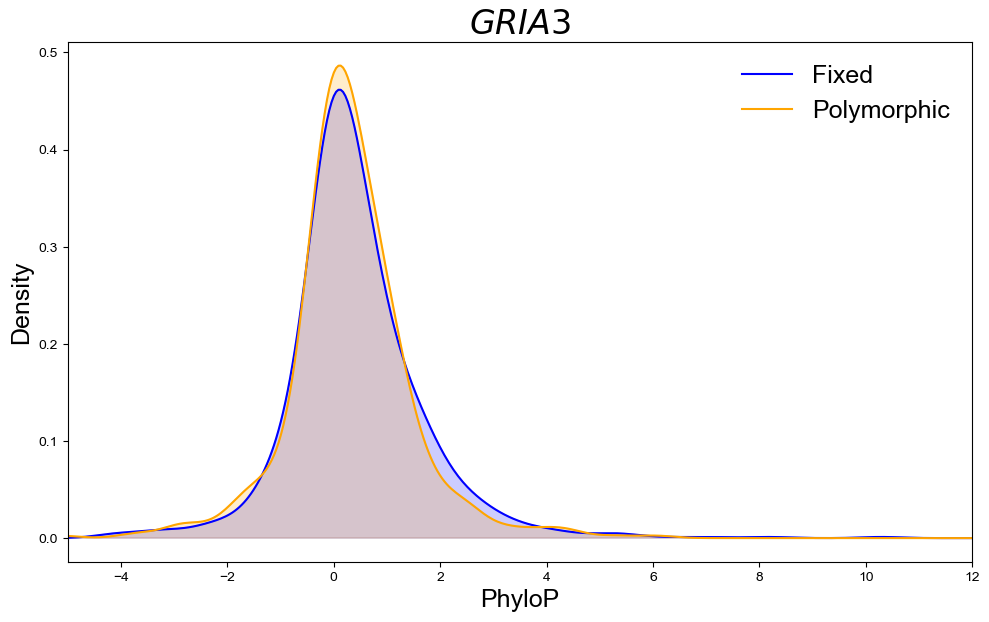

In [184]:

vk = vx.loc[np.intersect1d(vx.index, ["GRIA3"])]
vvk = vvx.loc[np.intersect1d(vvx.index, ["GRIA3"])]
x2 = [np.float64(x) for x in list(vk["PhyloP447"])]
yvals2 = [np.float64(j) for j in list(vvk["PhyloP447"])]
yvals2.sort()
vvv = prepare_alpha(vk, vvk, stat = "PhyloP447")
cuttt = 0.9
cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]
alpha = compute_alpha_cutoff(vvv, dn_cut = 0.05, plot = True, cutoff = cutoff, title = "$\it{GRIA3}$")

table1 = alpha[2]
table2 = alpha[3]
print((fisher_exact(table1, alternative = "greater")[1] + fisher_exact(table2, alternative = "greater")[1])/2)

C:\Users\astar\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\astar\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 11.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\astar\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 17.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\astar\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\astar\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 20.6% of the points c

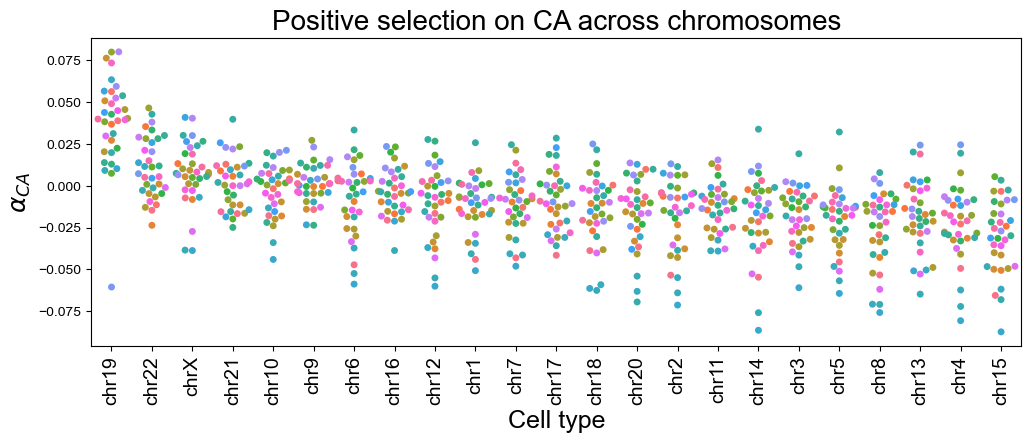

In [199]:
import os
df = pd.DataFrame()
out = []
for file in os.listdir("PerChrom_Results"):
    if "Bootstrap" not in file and "PhyloP" not in file and "FilterNewTEs" in file:
        
        x = pd.read_csv("PerChrom_Results/" + file, sep = "\t")
        x = x[x["Proportion"] == 0.9]
        x["CellType"] = np.repeat(d_abrev[file.replace("PerChrom_FilterNewTEs_", "").replace("_abs_logfc_SpecSup0_MAFCut0.25.txt.gz", "")], x.shape[0])
        out.append([d_abrev[file.replace("PerChrom_FilterNewTEs_", "").replace("_abs_logfc_SpecSup0_MAFCut0.25.txt.gz", "")], np.median(x["alpha"])])
        df = pd.concat([df, x])

medians = []
for chrom in np.unique(df["Chrom"]):
    dff = df[df["Chrom"].isin([chrom])]
    medians.append([chrom, np.median(dff["alpha"])])
df_med = pd.DataFrame(medians).sort_values(1, ascending = False)
order = list(df_med[0])
fig, ax = plt.subplots(figsize = (12, 4))
sns.swarmplot(data = df, x = "Chrom", y = "alpha", hue = "CellType", order = order)
plt.title("Positive selection on CA across chromosomes", size = 20)
plt.xlabel("Cell type", fontsize = 18)
plt.ylabel("$\\alpha_{CA}$", size = 18)
plt.xticks(rotation = 90, fontsize = 14)
plt.legend([], [], frameon = False)

In [201]:
df.sort_values("alpha")

,Chrom,Median Fixed PhyloP,Number Fixed Variants,Median Polymorphic PhyloP,Number Polymorphic Variants,Fisher exact p-value,MWU p-value,Fisher exact p-value; alt greater,MWU p-value; alt greater,alpha,Cutoff,"[[dc1, du1], [pc1, pu1]]","[[dc2, du2], [pc2, pu2]]",Proportion,CellType
157,chr15,0.016660,277458,0.017235,80886,5.662956e-10,2.042000e-13,1.000000e+00,1.000000e+00,-0.087314,0.054169,"[[25724, 251734], [8088, 72798]]","[[25724, 251734], [8089, 72797]]",0.9,FH peri.
156,chr14,0.016196,302005,0.016930,87168,1.789960e-10,3.841387e-24,1.000000e+00,1.000000e+00,-0.086382,0.053518,"[[28021, 273984], [8716, 78452]]","[[28021, 273984], [8717, 78451]]",0.9,FH peri.
155,chr4,0.015215,711210,0.015863,199467,1.227985e-19,1.353867e-44,1.000000e+00,1.000000e+00,-0.080639,0.051711,"[[66308, 644902], [19946, 179521]]","[[66308, 644902], [19947, 179520]]",0.9,FH peri.
155,chr14,0.022027,302005,0.022872,87168,1.721071e-08,7.358255e-15,1.000000e+00,1.000000e+00,-0.075876,0.075480,"[[28269, 273736], [8716, 78452]]","[[28269, 273736], [8717, 78451]]",0.9,FH fibro.
149,chr8,0.015896,556066,0.016444,150019,9.827011e-14,2.910790e-24,1.000000e+00,1.000000e+00,-0.075777,0.052958,"[[52055, 504011], [15001, 135018]]","[[52055, 504011], [15002, 135017]]",0.9,FH peri.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,chr19,0.019813,159552,0.019488,49884,1.156110e-04,7.070589e-04,5.802406e-05,3.535294e-04,0.063274,0.066875,"[[16919, 142633], [4988, 44896]]","[[16919, 142633], [4989, 44895]]",0.9,FH endocard.
1,chr19,0.024774,159552,0.024161,49884,6.839712e-06,6.872627e-06,3.451917e-06,3.436314e-06,0.073273,0.096452,"[[17082, 142470], [4988, 44896]]","[[17082, 142470], [4989, 44895]]",0.9,FG sertoli
2,chr19,0.025441,159552,0.024785,49884,2.781683e-06,3.698611e-07,1.398631e-06,1.849305e-07,0.076181,0.086541,"[[17130, 142422], [4988, 44896]]","[[17130, 142422], [4989, 44895]]",0.9,AC astro.
3,chr19,0.026898,159552,0.026410,49884,8.544671e-07,3.906369e-03,4.317032e-07,1.953184e-03,0.079793,0.101940,"[[17190, 142362], [4988, 44896]]","[[17190, 142362], [4989, 44895]]",0.9,FB fl. plate


In [ ]:
#Adjust to plot CI for 0.9 on chr19
dfp = df[df["Chrom"] == "chrX"]

medians = []
for chrom in np.unique(dfp["CellType"]):
    dff = dfp[dfp["CellType"].isin([chrom])]
    dff = dff.sort_values("alpha")
    print(chrom, list(dff["alpha"])[25], list(dff["alpha"])[975])
    medians.append([chrom, np.median(dff["alpha"])])
df_med = pd.DataFrame(medians).sort_values(1, ascending = False)
order = list(df_med[0])


fig, ax = plt.subplots(figsize = (18, 6))
sns.boxplot(data = dfp, x = "CellType", y = "alpha", order = order)
#plt.title("Neuron")

plt.xlabel("Cell type", fontsize = 18)
plt.ylabel("Alpha using abs logfc", fontsize = 18)
plt.xticks(rotation = 90, fontsize = 14)

In [200]:
#Repeated all this with KosoyRoussosControlMicroglia and LiangSteinProgenitor
v = pd.read_csv("Fixed_KosoyRoussosControlMicroglia.txt.gz", sep = "\t")
vv = pd.read_csv("Poly_MAF0.25_KosoyRoussosControlMicroglia.txt.gz", sep = "\t")


try:
    vv = add_unfold(vv)
    vv_ref = vv[vv["Human ref"] == vv["Chimp ref"]]
    vv_alt = vv[vv["Human alt"] == vv["Chimp ref"]]
    vv_ref["fixed logfc"] = -vv_ref["logfc"].astype(float)
    vv_alt["fixed logfc"] = vv_alt["logfc"].astype(float)
    vv = pd.concat([vv_ref, vv_alt])
except:
    pass

te_blacklist = pd.read_csv("BlacklistTE_Variants.txt", sep = "\t")
    
v = v[~v["Position"].isin(te_blacklist["Position"])]
vv = vv[~vv["Position"].isin(te_blacklist["Position"])]

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:583: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yvalls_alt["UnfoldedMAF"] = 1-yvalls_alt["MAFMaxAcrossAncestry"]
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:584: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yvalls_ref["UnfoldedMAF"] = yvalls_ref["MAFMaxAcrossAncestry"]
C:\Users\astar\AppData\Local\Temp\ipykernel_21424\1377797885.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [201]:
#Restrict to chr19
v["Chrom"] = [x.split(":")[0] for x in v["Position"]]
vv["Chrom"] = [x.split(":")[0] for x in vv["Position"]]

vx = v[v["Chrom"].isin(["chr19"])]
vvx = vv[vv["Chrom"].isin(["chr19"])]

In [183]:
c = 0
out = []
vx.index = vx["NearestGene"]
vvx.index = vvx["NearestGene"]

for key in d_BP.keys():
    if c%1000 == 0:
        print(c)
    if len(d_BP[key]) >= 15 and len(d_BP[key]) < 100000:
        vk = vx.loc[np.intersect1d(np.intersect1d(vx.index, d_BP[key]), vvx.index)]
        vvk = vvx.loc[np.intersect1d(np.intersect1d(vvx.index, d_BP[key]), vx.index)]
        x2 = [np.float64(x) for x in list(vk["abs logfc"])]
        yvals2 = [np.float64(j) for j in list(vvk["abs logfc"])]
        yvals2.sort()
        if len(vk.index) >= 100 and len(vvk.index) >= 50:
            vvv = prepare_alpha(vk, vvk, stat = "abs logfc")
            for cuttt in [0.6, 0.7, 0.8, 0.9]:
                cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]
                alpha = compute_alpha_cutoff(vvv, dn_cut = 0.05, plot = False, cutoff = cutoff)

                table1 = alpha[2]
                table2 = alpha[3]
                
                out.append([key, np.median(x2), len(x2), np.median(yvals2), len(yvals2), (fisher_exact(table1)[1] + fisher_exact(table2)[1])/2, mwu(x2, yvals2)[1], (fisher_exact(table1, alternative = "greater")[1] + fisher_exact(table2, alternative = "greater")[1])/2, mwu(x2, yvals2, alternative = "greater")[1], alpha[0], alpha[1], table1, table2, cuttt])
    c += 1
    
from statsmodels.stats.multitest import fdrcorrection
df = pd.DataFrame(out)
df = df.sort_values(7)
df.columns = ["Term", "Median Fixed PhyloP", "Number Fixed Variants", "Median Polymorphic PhyloP", "Number Polymorphic Variants", "Fisher exact p-value", "MWU p-value", "Fisher exact p-value; alt greater", "MWU p-value; alt greater", "alpha", "Cutoff", "[[dc1, du1], [pc1, pu1]]", "[[dc2, du2], [pc2, pu2]]", "Proportion"]
df.to_csv("ForPub_FisherExact_Unfold_GOBP_NonCod_MafCut0.25-0.75_chr19_KosoyRoussosControlMicroglia.csv", index = False)

0
1000
2000
3000
4000
5000


In [224]:
c = 0
out = []
vx.index = vx["NearestGene"]
vvx.index = vvx["NearestGene"]

for key in d_HPO.keys():
    if c%1000 == 0:
        print(c)
    if len(d_HPO[key]) >= 15 and len(d_HPO[key]) < 100:
        vk = vx.loc[np.intersect1d(np.intersect1d(vx.index, d_HPO[key]), vvx.index)]
        vvk = vvx.loc[np.intersect1d(np.intersect1d(vvx.index, d_HPO[key]), vx.index)]
        x2 = [np.float64(x) for x in list(vk["abs logfc"])]
        yvals2 = [np.float64(j) for j in list(vvk["abs logfc"])]
        yvals2.sort()
        if len(vk.index) >= 100 and len(vvk.index) >= 50:
            vvv = prepare_alpha(vk, vvk, stat = "abs logfc")
            for cuttt in [0.6, 0.7, 0.8, 0.9]:
                cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]
                alpha = compute_alpha_cutoff(vvv, dn_cut = 0.05, plot = False, cutoff = cutoff)

                table1 = alpha[2]
                table2 = alpha[3]
                
                out.append([key, np.median(x2), len(x2), np.median(yvals2), len(yvals2), (fisher_exact(table1)[1] + fisher_exact(table2)[1])/2, mwu(x2, yvals2)[1], (fisher_exact(table1, alternative = "greater")[1] + fisher_exact(table2, alternative = "greater")[1])/2, mwu(x2, yvals2, alternative = "greater")[1], alpha[0], alpha[1], table1, table2, cuttt])
    c += 1
    
from statsmodels.stats.multitest import fdrcorrection
df = pd.DataFrame(out)
df = df.sort_values(7)
df.columns = ["Term", "Median Fixed PhyloP", "Number Fixed Variants", "Median Polymorphic PhyloP", "Number Polymorphic Variants", "Fisher exact p-value", "MWU p-value", "Fisher exact p-value; alt greater", "MWU p-value; alt greater", "alpha", "Cutoff", "[[dc1, du1], [pc1, pu1]]", "[[dc2, du2], [pc2, pu2]]", "Proportion"]
df.to_csv("ForPub_FisherExact_Unfold_HPO_NonCod_MafCut0.25-0.75_chr19_KosoyRoussosControlMicroglia.csv", index = False)

0
1000
2000
3000
4000
5000
6000
7000


In [197]:
df = pd.read_csv("ForPub_FisherExact_Unfold_GOBP_NonCod_MafCut0.25-0.75_chr19_KosoyRoussosControlMicroglia.csv")
new_df = pd.DataFrame()
for prop in np.unique(df["Proportion"]):
    df2 = df[df["Proportion"] == prop]
    df2["Fisher exact FDR"] = fdrcorrection(df2["Fisher exact p-value"])[1]
    df2["MWU FDR"] = fdrcorrection(df2["MWU p-value"])[1]
    new_df = pd.concat([new_df, df2])
df = new_df.sort_values("Fisher exact FDR")
df_sig = df[df["Fisher exact FDR"] < 0.05]
df_sig2 = df[df["MWU FDR"] < 0.05]
df_sig

C:\Users\astar\AppData\Local\Temp\ipykernel_21424\1786536366.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Fisher exact FDR"] = fdrcorrection(df2["Fisher exact p-value"])[1]
C:\Users\astar\AppData\Local\Temp\ipykernel_21424\1786536366.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["MWU FDR"] = fdrcorrection(df2["MWU p-value"])[1]
C:\Users\astar\AppData\Local\Temp\ipykernel_21424\1786536366.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

,Term,Median Fixed PhyloP,Number Fixed Variants,Median Polymorphic PhyloP,Number Polymorphic Variants,Fisher exact p-value,MWU p-value,Fisher exact p-value; alt greater,MWU p-value; alt greater,alpha,Cutoff,"[[dc1, du1], [pc1, pu1]]","[[dc2, du2], [pc2, pu2]]",Proportion,Fisher exact FDR,MWU FDR
4335,Regulation Of DNA-templated Transcription (GO:...,0.011801,31577,0.013209,7854,1.012779e-11,2.582577e-11,1.000000,1.000000,-0.193257,0.017669,"[[11318, 20259], [3141, 4713]]","[[11318, 20259], [3142, 4712]]",0.6,1.097852e-08,2.799513e-08
4334,Regulation Of DNA-templated Transcription (GO:...,0.011801,31577,0.013209,7854,8.683203e-09,2.582577e-11,1.000000,1.000000,-0.174129,0.023083,"[[8445, 23132], [2356, 5498]]","[[8445, 23132], [2357, 5497]]",0.7,9.412592e-06,2.799513e-08
4333,Regulation Of DNA-templated Transcription (GO:...,0.011801,31577,0.013209,7854,9.908933e-08,2.582577e-11,1.000000,1.000000,-0.187126,0.031627,"[[5492, 26085], [1570, 6284]]","[[5492, 26085], [1571, 6283]]",0.8,1.074128e-04,2.799513e-08
4332,Regulation Of Nucleic Acid-Templated Transcrip...,0.012636,11629,0.014413,3507,9.249336e-06,8.817496e-07,0.999996,1.000000,-0.192507,0.018888,"[[4169, 7460], [1402, 2105]]","[[4169, 7460], [1403, 2104]]",0.6,5.013140e-03,4.779083e-04
4329,Regulation Of Gene Expression (GO:0010468),0.012170,17009,0.013326,4627,3.761683e-05,2.558830e-06,0.999983,0.999999,-0.151097,0.017801,"[[6237, 10772], [1850, 2777]]","[[6237, 10772], [1851, 2776]]",0.6,1.266787e-02,6.934429e-04
4330,Cellular Response To Virus (GO:0098586),0.009879,691,0.017121,136,4.674489e-05,1.609841e-06,0.999988,0.999999,-1.293553,0.022351,"[[156, 535], [54, 82]]","[[156, 535], [55, 81]]",0.6,1.266787e-02,5.816891e-04
4331,Potassium Ion Transmembrane Transport (GO:0071...,0.009807,845,0.012343,196,2.806990e-05,1.061755e-03,0.999993,0.999470,-1.591399,0.034972,"[[75, 770], [39, 157]]","[[75, 770], [40, 156]]",0.8,1.521388e-02,8.768990e-02
4325,Regulation Of Immune Response (GO:0050776),0.010128,330,0.017720,88,1.817204e-04,7.989941e-04,0.999956,0.999602,-1.705370,0.025662,"[[66, 264], [35, 53]]","[[66, 264], [36, 52]]",0.6,3.939699e-02,7.217580e-02


In [199]:
df_sig.loc[4331]["Term"]

'Potassium Ion Transmembrane Transport (GO:0071805)'

5.477595066365232e-12
(-0.19545375122066744, 0.017668694, [[11347, 20344], [3159, 4739]], [[11347, 20344], [3160, 4738]], <Figure size 1000x600 with 1 Axes>)


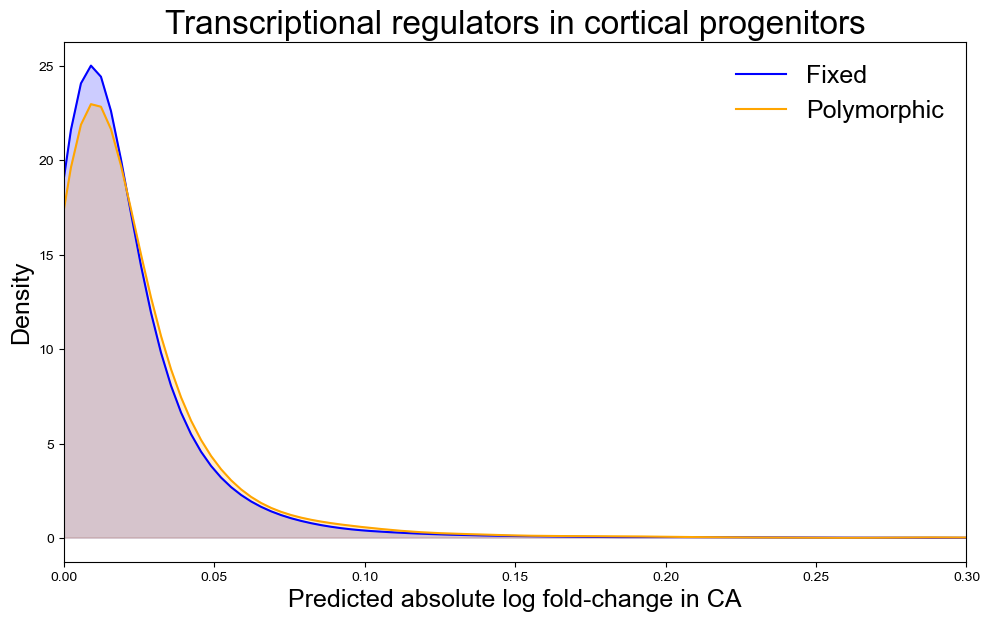

In [202]:
#Look specifically at genes that regulate transcription
vx.index = vx["NearestGene"]
vvx.index = vvx["NearestGene"]
vk = vx.loc[np.intersect1d(vx.index, d_BP["Regulation Of DNA-templated Transcription (GO:0006355)"])]
vvk = vvx.loc[np.intersect1d(vvx.index, d_BP["Regulation Of DNA-templated Transcription (GO:0006355)"])]
x2 = [np.float64(x) for x in list(vk["abs logfc"])]
yvals2 = [np.float64(j) for j in list(vvk["abs logfc"])]
yvals2.sort()
vvv = prepare_alpha(vk, vvk, stat = "abs logfc")
cuttt = 0.6
cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]
alpha = compute_alpha_cutoff(vvv, dn_cut = 0.05, plot = True, cutoff = cutoff, window = [0, 0.3], title = "Transcriptional regulators in cortical progenitors")
plt.xlabel("Predicted absolute log fold-change in CA")
table1 = alpha[2]
table2 = alpha[3]
print((fisher_exact(table1)[1] + fisher_exact(table2)[1])/2)
print(alpha)

In [14]:
#Checking to make sure that their is no bias toward w->s, s->w etc.
x = pd.read_csv("ASE_SNPs.FILTER.SPLIT_SPECIES.bed", sep = "\t", header = None)
x["Position"] = x[0] + ":" + x[2].astype(str)
x = x[[3, "Position"]]
x.columns = ["Mut", "Position"]
x = x.set_index("Position")

vx.index = vx["Position"]
vx = vx.join(x)
vx_ws = vx[vx["Mut"].isin(["C|A", "G|A", "C|T", "G|T"])]
vx_sw = vx[vx["Mut"].isin(["A|C", "A|G", "T|C", "T|G"])]
vx_ww_ss = vx[~vx["Position"].isin(list(vx_ws["Position"]) + list(vx_sw["Position"]))]

mut = []
for index, row in vvx.iterrows():
    if row["Human ref"] == row["Chimp ref"]:
        mut.append(row["Human alt"] + "|" + row["Chimp ref"])
    else:
        mut.append(row["Human ref"] + "|" + row["Chimp ref"])
vvx["Mut"] = mut

vvx_ws = vvx[vvx["Mut"].isin(["C|A", "G|A", "C|T", "G|T"])]
vvx_sw = vvx[vvx["Mut"].isin(["A|C", "A|G", "T|C", "T|G"])]
vvx_ww_ss = vvx[~vvx["Position"].isin(list(vvx_ws["Position"]) + list(vvx_sw["Position"]))]

print(vx_ws.shape[0]/(50321 + 87287 + 21944), vx_sw.shape[0]/(50321 + 87287 + 21944), vx_ww_ss.shape[0]/(50321 + 87287 + 21944))
print(vvx_ws.shape[0]/(12721 + 23178 + 6010), vvx_sw.shape[0]/(12721 + 23178 + 6010), vvx_ww_ss.shape[0]/(12721 + 23178 + 6010))

vx.index = vx["NearestGene"]
vx_ws.index = vx_ws["NearestGene"]
vx_sw.index = vx_sw["NearestGene"]
vx_ww_ss.index = vx_ww_ss["NearestGene"]

vk = vx_sw.loc[np.intersect1d(vx_sw.index, d_BP["Regulation Of DNA-templated Transcription (GO:0006355)"])]
vvk = vvx_sw.loc[np.intersect1d(vvx_sw.index, d_BP["Regulation Of DNA-templated Transcription (GO:0006355)"])]
x2 = [np.float64(x) for x in list(vk["abs logfc"])]
yvals2 = [np.float64(j) for j in list(vvk["abs logfc"])]
yvals2.sort()
vvv = prepare_alpha(vk, vvk, stat = "abs logfc")
cuttt = 0.8
cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]
alpha = compute_alpha_cutoff(vvv, dn_cut = 0.05, plot = True, cutoff = cutoff, window = [0, 0.3])

table1 = alpha[2]
table2 = alpha[3]
print((fisher_exact(table1)[1] + fisher_exact(table2)[1])/2)
print(alpha)

In [91]:
#No bias in mutational spectrum at all which is good
cf = Counter(vk["Mut"])
cp = Counter(vvk["Mut"])

for key in cf.keys():
    print(key, cf[key]/(sum(cf.values())), cp[key]/(sum(cp.values())))

G|A 0.392895169877069 0.40007993605115905
C|T 0.3997676894782693 0.39408473221422863
C|A 0.09911915593843772 0.10191846522781775
G|T 0.10821798470622399 0.10391686650679456


In [203]:
#Restricting to the ZNF genes
znf_all = []
for key in d_BP["Regulation Of DNA-templated Transcription (GO:0006355)"]:
    if "ZNF" in key:
        znf_all.append(key)


8.372010059855749e-08
(-0.2136560333797013, 0.019777775, [[4840, 8812], [1711, 2568]], [[4840, 8812], [1712, 2567]], <Figure size 1000x600 with 1 Axes>)


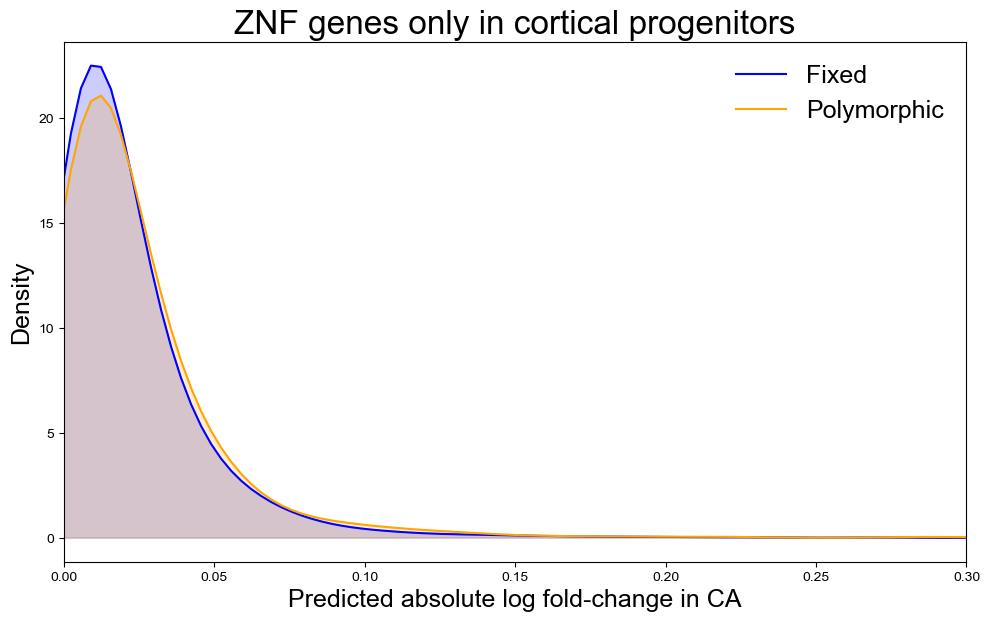

In [204]:
#Look specifically at the ZNF genes
vx.index = vx["NearestGene"]
vvx.index = vvx["NearestGene"]
vk = vx.loc[np.intersect1d(vx.index, znf_all)]
vvk = vvx.loc[np.intersect1d(vvx.index, znf_all)]
x2 = [np.float64(x) for x in list(vk["abs logfc"])]
yvals2 = [np.float64(j) for j in list(vvk["abs logfc"])]
yvals2.sort()
vvv = prepare_alpha(vk, vvk, stat = "abs logfc")
cuttt = 0.6
cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]
alpha = compute_alpha_cutoff(vvv, dn_cut = 0.05, plot = True, cutoff = cutoff, window = [0, 0.3], title = "ZNF genes only in cortical progenitors")
plt.xlabel("Predicted absolute log fold-change in CA")

table1 = alpha[2]
table2 = alpha[3]
print((fisher_exact(table1)[1] + fisher_exact(table2)[1])/2)
print(alpha)

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

(-0.25758865841940604, 0.018918801, [[677, 1276], [198, 298]], [[677, 1276], [199, 297]], <Figure size 1000x600 with 1 Axes>)
SignificanceResult(statistic=0.7985260124758558, pvalue=0.03145835321240976)


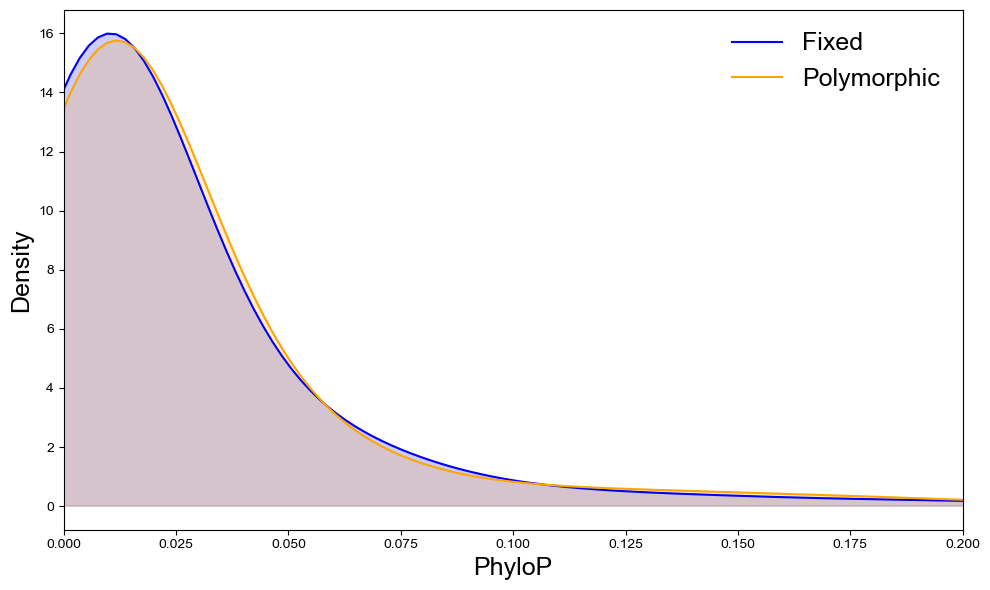

In [205]:
#If we only do sites in putative CREs, we see the same thing
vx_gene2 = vk[(vk["allele1_pred_counts"] > 400) | (vk["allele2_pred_counts"] > 400)]
vvx_gene2 = vvk[(vvk["allele1_pred_counts"] > 400) | (vvk["allele2_pred_counts"] > 400)]

cuttt = 0.6
yvals2 = [np.float64(j) for j in list(vvx_gene2["abs logfc"])]
yvals2.sort()
vvv = prepare_alpha(vx_gene2, vvx_gene2, stat = "abs logfc")
cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]

alpha = compute_alpha_cutoff(vvv, dn_cut = 0.01, plot = True, cutoff = cutoff, window = [0, 0.2])
print(alpha)
print(fisher_exact(alpha[2]))


In [168]:
pli = pd.read_csv("gnomad.v4.1.constraint_metrics.tsv", sep = "\t")
pli = pli.dropna()
pli = pli[pli["lof.pLI"] < 0.01]
pli

,gene,gene_id,transcript,canonical,mane_select,lof_hc_lc.obs,lof_hc_lc.exp,lof_hc_lc.possible,lof_hc_lc.oe,lof_hc_lc.mu,...,syn.oe_ci.lower,syn.oe_ci.upper,syn.z_raw,syn.z_score,constraint_flags,level,transcript_type,chromosome,cds_length,num_coding_exons
1,A1BG,ENSG00000121410,ENST00000263100,True,True,45.0,43.048,193.0,1.04540,7.063300e-07,...,0.973,1.172,-1.166000,-0.635490,[],2.0,protein_coding,chr19,1485.0,8.0
18,A1CF,ENSG00000148584,ENST00000373997,True,True,45.0,69.962,352.0,0.64320,9.547100e-07,...,0.903,1.103,0.032727,0.017838,[],2.0,protein_coding,chr10,1758.0,11.0
28,A2M,ENSG00000175899,ENST00000318602,True,True,95.0,147.240,745.0,0.64522,1.344500e-06,...,0.806,0.929,3.368800,1.836200,[],2.0,protein_coding,chr12,4422.0,36.0
39,A2ML1,ENSG00000166535,ENST00000299698,True,True,146.0,176.050,881.0,0.82930,1.700700e-06,...,0.874,0.996,1.745200,0.951210,[],2.0,protein_coding,chr12,4362.0,35.0
46,A3GALT2,ENSG00000184389,ENST00000442999,True,True,41.0,26.559,110.0,1.54380,3.376300e-07,...,1.425,1.753,-7.333400,-3.997000,"[""outlier_mis""]",2.0,protein_coding,chr1,1020.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210654,ZWINT,ENSG00000122952,ENST00000373944,True,True,41.0,42.643,193.0,0.96148,7.245800e-07,...,0.854,1.138,0.171260,0.093345,[],2.0,protein_coding,chr10,831.0,8.0
210663,ZXDC,ENSG00000070476,ENST00000389709,True,True,58.0,61.640,298.0,0.94095,8.418200e-07,...,1.146,1.318,-4.890800,-2.665700,[],2.0,protein_coding,chr3,2574.0,10.0
210676,ZYG11A,ENSG00000203995,ENST00000371528,True,True,50.0,66.095,324.0,0.75649,1.286400e-06,...,0.839,1.028,1.213600,0.661480,[],2.0,protein_coding,chr1,2277.0,14.0
210687,ZYX,ENSG00000159840,ENST00000322764,True,True,39.0,58.481,263.0,0.66688,1.117000e-06,...,0.933,1.122,-0.410930,-0.223980,[],2.0,protein_coding,chr7,1716.0,9.0


In [159]:
#Using eQTL data from Kosoy Roussos paper, znf genes on chr19 are more likely to have eQTLs than non-znf genes
x = pd.read_csv("FDR_0.1_Meta_eQTLs_.csv")
z = pd.read_csv("human_protein_coding.txt", sep = "\t", header = None)
y = z.set_index(1).join(x.set_index("Gene_Symbol"))
y = y.dropna()

chr19 = z[z[0].isin(["chr19"])]

chr19_znf = []
chr19_nonznf = []
for index, row in chr19.iterrows():
    if row[1].startswith("ZNF"):
        chr19_znf.append(row[1])
    else:
        chr19_nonznf.append(row[1])

In [161]:
#Test here
znf_e = len(np.intersect1d(chr19_znf, y.index))
znf_ne = len(np.setdiff1d(chr19_znf, y.index))
nznf_e = len(np.intersect1d(chr19_nonznf, y.index))
nznf_ne = len(np.setdiff1d(chr19_nonznf, y.index))

print(fisher_exact([[znf_e, znf_ne], [nznf_e, nznf_ne]]), [[znf_e, znf_ne], [nznf_e, nznf_ne]])

SignificanceResult(statistic=2.3525512253917236, pvalue=1.776011803265731e-08) [[98, 152], [262, 956]]


In [169]:
#Even when restricting to only genes with no evidence for dosage sensitivity, we see the same thing
znf_e = len(np.intersect1d(np.intersect1d(chr19_znf, y.index), pli["gene"]))
znf_ne = len(np.intersect1d(np.setdiff1d(chr19_znf, y.index), pli["gene"]))
nznf_e = len(np.intersect1d(np.intersect1d(chr19_nonznf, y.index), pli["gene"]))
nznf_ne = len(np.intersect1d(np.setdiff1d(chr19_nonznf, y.index), pli["gene"]))

print(fisher_exact([[znf_e, znf_ne], [nznf_e, nznf_ne]]), [[znf_e, znf_ne], [nznf_e, nznf_ne]])

SignificanceResult(statistic=1.9553999669221016, pvalue=0.00029695512461876193) [[63, 97], [187, 563]]


In [ ]:
#Using eQTL data from here, znf genes on chr19 are more likely to have eQTLs than non-znf genes
x = pd.read_csv("All_eQTL_Bryois_Malhotra.csv")
x = x[x["cell_type"].isin(["Excitatory neurons"])]
x = x[x["adj_p"] < 0.05]

z = pd.read_csv("human_protein_coding.txt", sep = "\t", header = None)

chr19 = z[z[0].isin(["chr19"])]

chr19_znf = []
chr19_nonznf = []
for index, row in chr19.iterrows():
    if row[1].startswith("ZNF"):
        chr19_znf.append(row[1])
    else:
        chr19_nonznf.append(row[1])
        
#Test here
znf_e = len(np.intersect1d(chr19_znf, x['symbol']))
znf_ne = len(np.setdiff1d(chr19_znf, x['symbol']))
nznf_e = len(np.intersect1d(chr19_nonznf, x['symbol']))
nznf_ne = len(np.setdiff1d(chr19_nonznf, x['symbol']))

print(fisher_exact([[znf_e, znf_ne], [nznf_e, nznf_ne]]), [[znf_e, znf_ne], [nznf_e, nznf_ne]])

In [173]:
#Not enough genes on chr19 with caQTLs to get a good idea...
x = pd.read_csv("PeakInfoDetailed_210832_OCRs.csv").set_index("PeakID")
x = x.join(pd.read_csv("FDR_0.05_Meta_caQTLs.csv").set_index("PeakID"))
x = x.dropna()

z = pd.read_csv("human_protein_coding.txt", sep = "\t", header = None)
y = z.set_index(1).join(x.set_index("Associated.Gene.Name"))
y = y.dropna()

chr19 = z[z[0].isin(["chr19"])]

chr19_znf = []
chr19_nonznf = []
for index, row in chr19.iterrows():
    if row[1].startswith("ZNF"):
        chr19_znf.append(row[1])
    else:
        chr19_nonznf.append(row[1])

0.012319370309842858
(-0.09810284495405619, 0.0153379105, [[6814, 11225], [1447, 2172]], [[6814, 11225], [1448, 2171]], <Figure size 1000x600 with 1 Axes>)


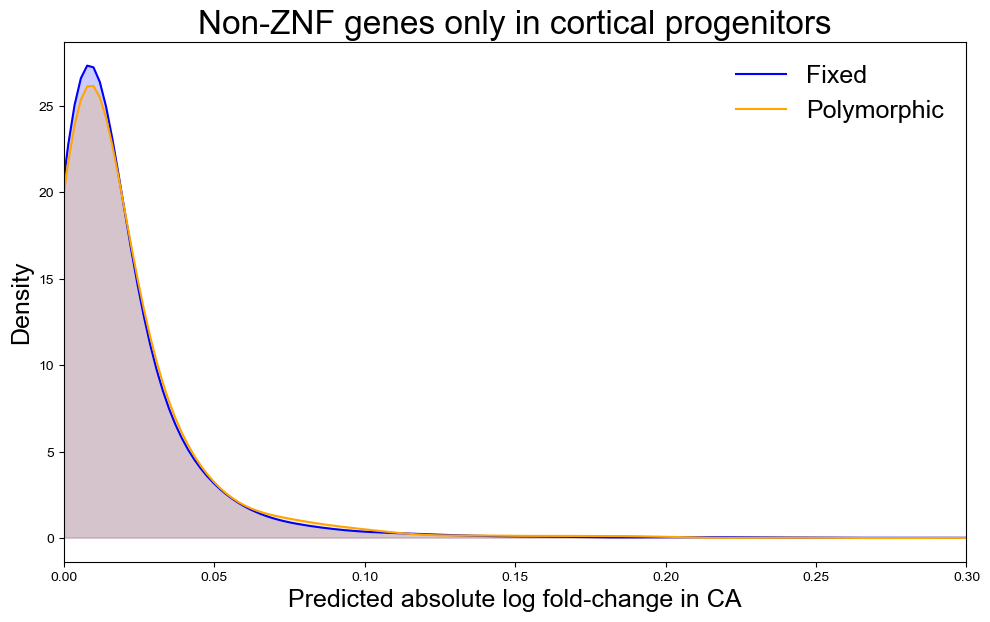

In [206]:
#Look specifically at the non-ZNF genes
vx.index = vx["NearestGene"]
vvx.index = vvx["NearestGene"]
vk = vx.loc[np.intersect1d(vx.index, np.setdiff1d(d_BP["Regulation Of DNA-templated Transcription (GO:0006355)"], znf_all))]
vvk = vvx.loc[np.intersect1d(vvx.index, np.setdiff1d(d_BP["Regulation Of DNA-templated Transcription (GO:0006355)"], znf_all))]
x2 = [np.float64(x) for x in list(vk["abs logfc"])]
yvals2 = [np.float64(j) for j in list(vvk["abs logfc"])]
yvals2.sort()
vvv = prepare_alpha(vk, vvk, stat = "abs logfc")
cuttt = 0.6
cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]
alpha = compute_alpha_cutoff(vvv, dn_cut = 0.05, plot = True, cutoff = cutoff, window = [0, 0.3], title = "Non-ZNF genes only in cortical progenitors")
plt.xlabel("Predicted absolute log fold-change in CA")

table1 = alpha[2]
table2 = alpha[3]
print((fisher_exact(table1)[1] + fisher_exact(table2)[1])/2)
print(alpha)

In [120]:
#No bias toward up or downregulation for the polymorphisms relative to fixed differences
table = [[141, 149], [61, 62]]
fisher_exact(table)

SignificanceResult(statistic=0.9618219826163494, pvalue=0.9143690689860533)

4.437447212555754e-05
(-1.4426672567210885, 0.03497204, [[93, 900], [39, 157]], [[93, 900], [40, 156]], <Figure size 1000x600 with 1 Axes>)


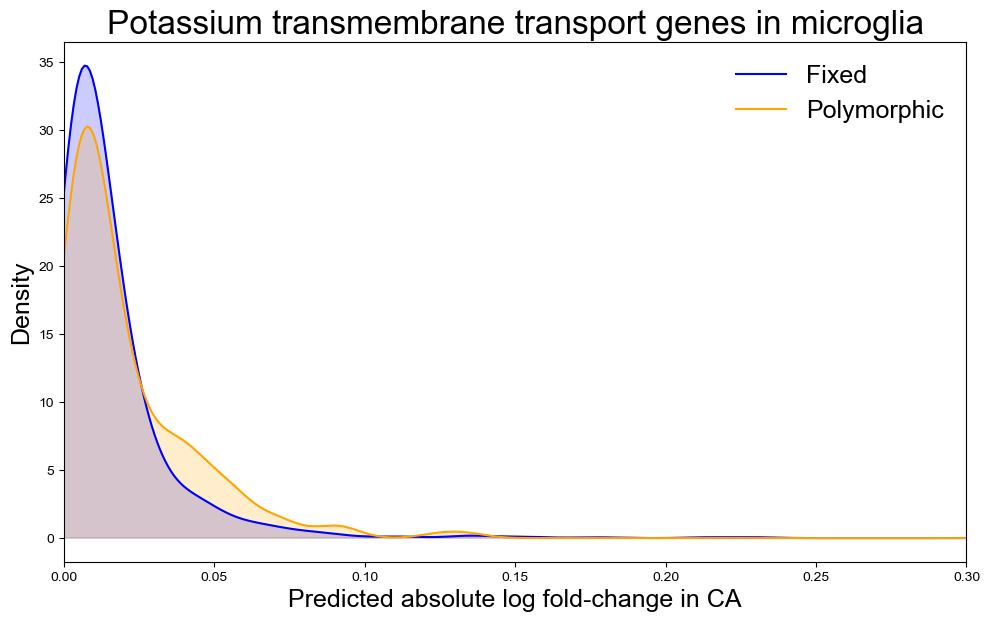

In [216]:
#Look specifically at genes that regulate viral response or potassium ion transport
vx.index = vx["NearestGene"]
vvx.index = vvx["NearestGene"]
vk = vx.loc[np.intersect1d(vx.index, d_BP["Potassium Ion Transmembrane Transport (GO:0071805)"])]
vvk = vvx.loc[np.intersect1d(vvx.index, d_BP["Potassium Ion Transmembrane Transport (GO:0071805)"])]
x2 = [np.float64(x) for x in list(vk["abs logfc"])]
yvals2 = [np.float64(j) for j in list(vvk["abs logfc"])]
yvals2.sort()
vvv = prepare_alpha(vk, vvk, stat = "abs logfc")
cuttt = 0.8
cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]
alpha = compute_alpha_cutoff(vvv, dn_cut = 0.05, plot = True, cutoff = cutoff, window = [0, 0.3], title = "Potassium transmembrane transport genes in microglia")
plt.xlabel("Predicted absolute log fold-change in CA")
table1 = alpha[2]
table2 = alpha[3]
print((fisher_exact(table1)[1] + fisher_exact(table2)[1])/2)
print(alpha)

In [212]:
Counter(vvk.index)

Counter({'ATP4A': 19,
         'HCN2': 34,
         'HPN': 14,
         'KCNA7': 6,
         'KCNC3': 70,
         'KCNK6': 1,
         'KCNN1': 23,
         'KCNN4': 29})

In [211]:
Counter(vk.index)

Counter({'ATP1A3': 128,
         'ATP4A': 110,
         'HCN2': 30,
         'HPN': 198,
         'KCNA7': 16,
         'KCNC3': 266,
         'KCNJ14': 20,
         'KCNK6': 23,
         'KCNN1': 81,
         'KCNN4': 121})

2.8069897541738216e-05
(-1.5913985519081062, 0.03497204, [[75, 770], [39, 157]], [[75, 770], [40, 156]], <Figure size 1000x600 with 1 Axes>)


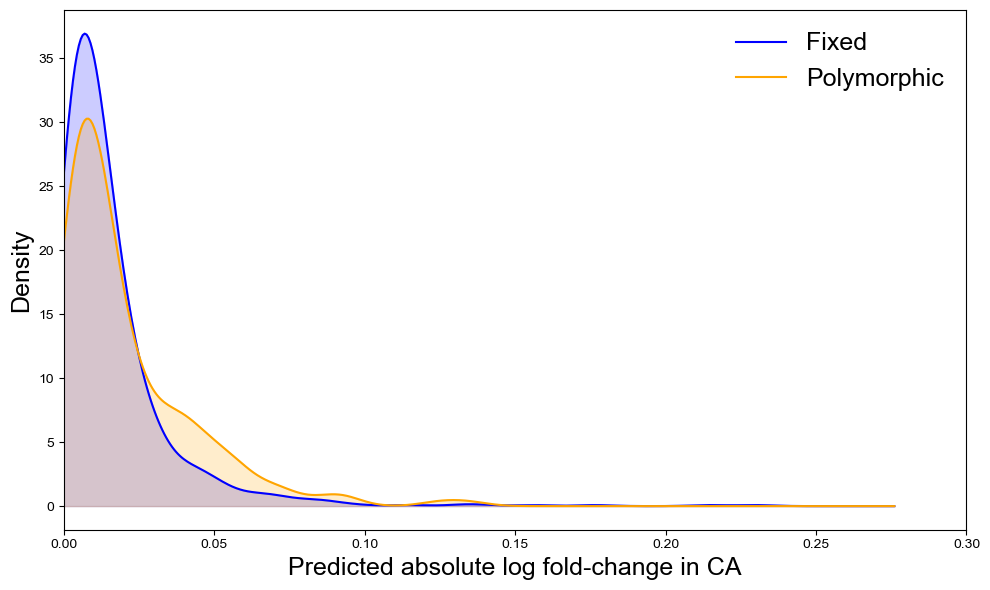

In [215]:
#Look specifically at genes that regulate viral response, removing genes with a lot of fixed differences and few polymorphic
#This doesn't affect things
vx.index = vx["NearestGene"]
vvx.index = vvx["NearestGene"]
vk = vx.loc[np.intersect1d(vx.index, np.setdiff1d(d_BP["Potassium Ion Transmembrane Transport (GO:0071805)"], ["ATP1A3", "KCNJ14"]))]
vvk = vvx.loc[np.intersect1d(vvx.index, np.setdiff1d(d_BP["Potassium Ion Transmembrane Transport (GO:0071805)"], ["ATP1A3", "KCNJ14"]))]
x2 = [np.float64(x) for x in list(vk["abs logfc"])]
yvals2 = [np.float64(j) for j in list(vvk["abs logfc"])]
yvals2.sort()
vvv = prepare_alpha(vk, vvk, stat = "abs logfc")
cuttt = 0.8
cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]
alpha = compute_alpha_cutoff(vvv, dn_cut = 0.05, plot = True, cutoff = cutoff, window = [0, 0.3])
plt.xlabel("Predicted absolute log fold-change in CA")
table1 = alpha[2]
table2 = alpha[3]
print((fisher_exact(table1)[1] + fisher_exact(table2)[1])/2)
print(alpha)

0.028813279902754445
(-0.5951851851851853, 0.022351306, [[120, 288], [53, 81]], [[120, 288], [54, 80]], <Figure size 1000x600 with 1 Axes>)


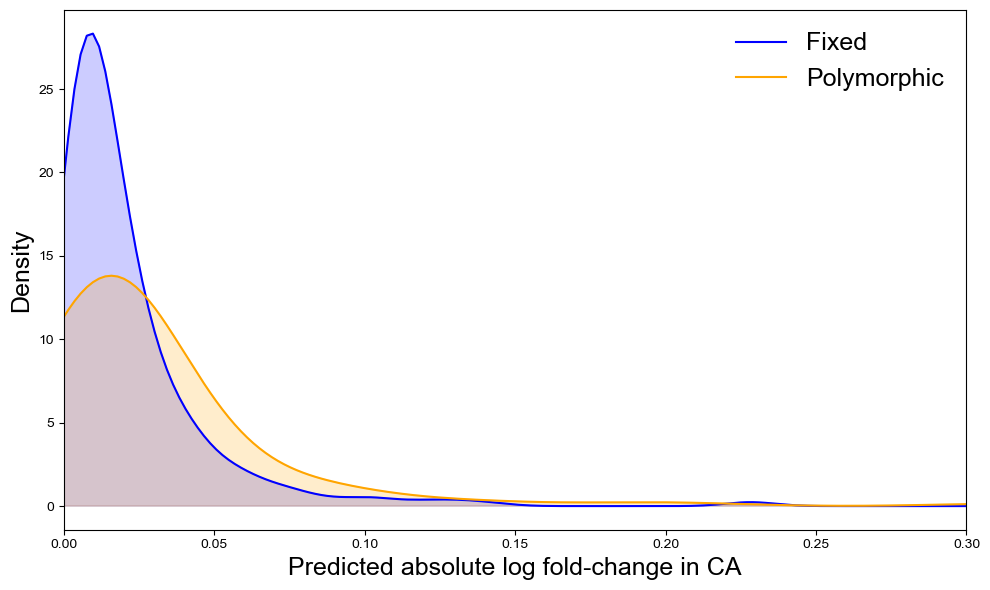

In [207]:
#Look specifically at genes that regulate viral response, removing genes with a lot of fixed differences and few polymorphic
#This doesn't affect things
vx.index = vx["NearestGene"]
vvx.index = vvx["NearestGene"]
vk = vx.loc[np.intersect1d(vx.index, np.setdiff1d(d_BP["Cellular Response To Virus (GO:0098586)"], ["POU2F2", "IRF3"]))]
vvk = vvx.loc[np.intersect1d(vvx.index, np.setdiff1d(d_BP["Cellular Response To Virus (GO:0098586)"], ["POU2F2", "IRF3"]))]
x2 = [np.float64(x) for x in list(vk["abs logfc"])]
yvals2 = [np.float64(j) for j in list(vvk["abs logfc"])]
yvals2.sort()
vvv = prepare_alpha(vk, vvk, stat = "abs logfc")
cuttt = 0.6
cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]
alpha = compute_alpha_cutoff(vvv, dn_cut = 0.05, plot = True, cutoff = cutoff, window = [0, 0.3])
plt.xlabel("Predicted absolute log fold-change in CA")
table1 = alpha[2]
table2 = alpha[3]
print((fisher_exact(table1)[1] + fisher_exact(table2)[1])/2)
print(alpha)